<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#First-look-at-our-datasets" data-toc-modified-id="First-look-at-our-datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First look at our datasets</a></span><ul class="toc-item"><li><span><a href="#Conners-scale" data-toc-modified-id="Conners-scale-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conners scale</a></span></li><li><span><a href="#IVA-II" data-toc-modified-id="IVA-II-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>IVA-II</a></span></li><li><span><a href="#EEG-data" data-toc-modified-id="EEG-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>EEG data</a></span></li><li><span><a href="#Distribution-normality" data-toc-modified-id="Distribution-normality-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Distribution normality</a></span><ul class="toc-item"><li><span><a href="#Conners-scale" data-toc-modified-id="Conners-scale-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Conners scale</a></span><ul class="toc-item"><li><span><a href="#Conners-Interactive-Plot" data-toc-modified-id="Conners-Interactive-Plot-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Conners Interactive Plot</a></span></li></ul></li><li><span><a href="#IVA-II" data-toc-modified-id="IVA-II-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>IVA-II</a></span><ul class="toc-item"><li><span><a href="#IVA-II-Interactive-Plot" data-toc-modified-id="IVA-II-Interactive-Plot-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>IVA-II Interactive Plot</a></span></li></ul></li><li><span><a href="#EEG-data" data-toc-modified-id="EEG-data-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>EEG data</a></span></li><li><span><a href="#Descriptive-stats-table-of-spectral-power-by-brain-oscillation-and-subtypes" data-toc-modified-id="Descriptive-stats-table-of-spectral-power-by-brain-oscillation-and-subtypes-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Descriptive stats table of spectral power by brain oscillation and subtypes</a></span></li><li><span><a href="#Spectral-power-within-each-frequency-band,-for-each-electrode-for-each-subtype" data-toc-modified-id="Spectral-power-within-each-frequency-band,-for-each-electrode-for-each-subtype-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Spectral power within each frequency band, for each electrode for each subtype</a></span><ul class="toc-item"><li><span><a href="#EEG-Interactive-Plot" data-toc-modified-id="EEG-Interactive-Plot-2.4.5.1"><span class="toc-item-num">2.4.5.1&nbsp;&nbsp;</span>EEG Interactive Plot</a></span></li></ul></li><li><span><a href="#Spectral-power-within-each-frequency-band,-for-each-electrode_pool-by-subtype" data-toc-modified-id="Spectral-power-within-each-frequency-band,-for-each-electrode_pool-by-subtype-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Spectral power within each frequency band, for each electrode_pool by subtype</a></span></li></ul></li><li><span><a href="#Variables-relations" data-toc-modified-id="Variables-relations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Variables relations</a></span><ul class="toc-item"><li><span><a href="#General-correlation-matrices" data-toc-modified-id="General-correlation-matrices-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>General correlation matrices</a></span></li><li><span><a href="#IVA-II" data-toc-modified-id="IVA-II-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>IVA-II</a></span></li></ul></li></ul></li></ul></div>

This notebook's purpose is to get a first look of our data, by computing descriptive statistics and by using simple visualization graphs.

We present 3 types of data; 
    - Conners Scale (self-report questionnaire)
    - IVA-II (behavioral test)
    - EEG data (average absolute power for 4 main waveband and subsets of these wavebands)

# Import data 

In [25]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing as pre
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff

First let's import the datasets with behavioral and self-report data

In [26]:
neuro = pd.read_excel("Data/Neuropsy.xlsx", na_values='.').dropna()
neuro['ID']='id_'+neuro['ID'].astype(str)
neuro.rename(columns={'ID':'id'}, inplace=True)# rename ID to id (to match eeg dataset)
neuro['subtype'] = neuro.apply(lambda x: pre.categorize_subtypes(x['inat'], x['hyper']), axis=1)# create a column with categorized subtybes (based on clinical thresholds)
neuro['is_inat'] = neuro['subtype'].apply(lambda x: 0 if x=='hyper' else 1) # create a columns to label prensence of inat and hyper
neuro['is_hyper'] = neuro['subtype'].apply(lambda x: 0 if x=='inat' else 1)
neuro = neuro.rename(columns={"Gender": "Sex"})# so it's more appropriate
neuro.reset_index(drop=True, inplace = True) # reset index as lines were removed with na_drop
neuro

id  Age  Sex   cIM   cHR   cIE   cSC  inat  hyper  Aqtot  Aqaudi  \
0     id_1   21    1  17.0  31.0  29.0   9.0  18.0   20.0   90.0    91.0   
1     id_3   20    1  10.0   5.0  13.0   1.0   8.0    5.0   27.0    34.0   
2     id_4   18    1  26.0  17.0   7.0  15.0  23.0   11.0   93.0    89.0   
3     id_7   23    1  24.0   8.0   6.0  14.0  19.0    3.0   86.0    66.0   
4    id_11   21    1  16.0  26.0  13.0  10.0  17.0   13.0   45.0    33.0   
..     ...  ...  ...   ...   ...   ...   ...   ...    ...    ...     ...   
91  id_602   19    1  25.0  14.0  20.0  18.0  21.0    8.0   80.0    87.0   
92  id_603   19    1  32.0  15.0  14.0  15.0  22.0    9.0  111.0   103.0   
93  id_700   18    2  13.0  33.0  14.0  11.0  18.0   15.0   83.0    80.0   
94  id_701   19    1  22.0  17.0  15.0  12.0  15.0   11.0    0.0    20.0   
95  id_702   18    1  17.0  14.0  10.0   9.0  12.0    3.0   91.0    88.0   

    Aqvis  RCQtot  RCQaudi  RCQvis subtype  is_inat  is_hyper  
0    92.0    94.0     80.0   110.0   mixed        1         1  
1    41.0    25.0     31.0    38.0   mixed        1         1  
2    96.0    90.0     92.0    90.0    inat        1         0  
3   112.0    94.0     90.0   100.0    inat        1         0  
4    78.0    69.0     51.0    94.0   mixed        1         1  
..    ...     ...      ...     ...     ...      ...       ...  
91   77.0    71.0     71.0    79.0    inat        1         0  
92  118.0    63.0     78.0    56.0    inat        1         0  
93   89.0    70.0     72.0    75.0   mixed        1         1  
94    0.0    29.0     32.0    42.0   mixed        1         1  
95   95.0    94.0     87.0   104.0    inat        1         0  

[96 rows x 18 columns]

Encoding the subtypes into numerocal labels 
* hyperactive = 0
* inattentive subtype = 1
* mixed subtype = 2

In [27]:
lb_make = LabelEncoder()
neuro["adhdtype"] = lb_make.fit_transform(neuro["subtype"])
neuro[["subtype", "adhdtype"]].head(11)

subtype  adhdtype
0    mixed         2
1    mixed         2
2     inat         1
3     inat         1
4    mixed         2
5    mixed         2
6    mixed         2
7    mixed         2
8     inat         1
9    mixed         2
10    inat         1

Import all all excel files into one df following function from our .py file

In [28]:
eeg = pre.process_all_excel_files()
eeg['fft_abs_power'] = eeg['fft_abs_power'].astype(float)
eeg['id'] = eeg['id'].astype(int)
eeg['id'] ='id_'+eeg['id'].astype(str)
eeg = eeg[['id', 'brain_oscillation','electrode', 'fft_abs_power']]
print(eeg.shape)
eeg.head(5)

(21109, 4)


id brain_oscillation electrode  fft_abs_power
0  id_134             Delta       FP1      15.565495
1  id_134             Delta       FP2      13.945462
2  id_134             Delta        F7      10.874886
3  id_134             Delta        F3      13.581803
4  id_134             Delta        Fz      15.644595

Selecting brain_oscillations of interest only

In [29]:
eeg = eeg.loc[(eeg['brain_oscillation'] != 'HighBeta') & (eeg['brain_oscillation'] != 'HighGamma') & (eeg['brain_oscillation'] != 'Gamma')]
eeg.brain_oscillation.value_counts()
eeg 

id brain_oscillation electrode  fft_abs_power
0      id_134             Delta       FP1      15.565495
1      id_134             Delta       FP2      13.945462
2      id_134             Delta        F7      10.874886
3      id_134             Delta        F3      13.581803
4      id_134             Delta        Fz      15.644595
...       ...               ...       ...            ...
21104   id_87             Beta2        Pz       1.224356
21105   id_87             Beta2        P4       1.139701
21106   id_87             Beta2        T6       1.157928
21107   id_87             Beta2        O1       2.315535
21108   id_87             Beta2        O2       1.199553

[15352 rows x 4 columns]

Merge dataframes together and keep columns of interest

In [30]:
#inner join to keep ids present in both dataframes
df = pd.merge(eeg, neuro[['id', 'Sex','subtype','adhdtype','is_inat','is_hyper', 'inat','hyper', 'cIM', 'cHR', 'cIE', 'cSC', 'Aqtot', 'Aqaudi', 'Aqvis', 'RCQtot', 'RCQaudi', 'RCQvis']], on='id', how='inner')
# Sort the rows of dataframe by column 'id'
df = df.sort_values(by ='id' )
print(df.shape)
print(len(df.id.unique()))
#create 3 df 
df_analysis = df[['id', 'Sex','adhdtype', 'cIM', 'cHR', 'cIE', 'cSC', 'Aqtot', 'Aqaudi', 'Aqvis', 'RCQtot', 'RCQaudi', 'RCQvis']]
df_eeg = df[['id', 'Sex','adhdtype','brain_oscillation','electrode','fft_abs_power']]
df = df[['id', 'Sex','subtype','adhdtype','is_inat','is_hyper', 'inat','hyper']]
print(df_analysis)
print(df.head())

(14592, 21)
96
          id  Sex  adhdtype   cIM   cHR   cIE   cSC  Aqtot  Aqaudi  Aqvis  \
12768   id_1    1         2  17.0  31.0  29.0   9.0   90.0    91.0   92.0   
12821   id_1    1         2  17.0  31.0  29.0   9.0   90.0    91.0   92.0   
12820   id_1    1         2  17.0  31.0  29.0   9.0   90.0    91.0   92.0   
12819   id_1    1         2  17.0  31.0  29.0   9.0   90.0    91.0   92.0   
12818   id_1    1         2  17.0  31.0  29.0   9.0   90.0    91.0   92.0   
...      ...  ...       ...   ...   ...   ...   ...    ...     ...    ...   
1268   id_99    1         2  19.0  28.0  27.0  12.0   84.0    84.0   86.0   
1269   id_99    1         2  19.0  28.0  27.0  12.0   84.0    84.0   86.0   
1270   id_99    1         2  19.0  28.0  27.0  12.0   84.0    84.0   86.0   
1272   id_99    1         2  19.0  28.0  27.0  12.0   84.0    84.0   86.0   
1367   id_99    1         2  19.0  28.0  27.0  12.0   84.0    84.0   86.0   

       RCQtot  RCQaudi  RCQvis  
12768    94.0     80.0   11

Create dframes and check dtypes

In [31]:
df_conners = neuro[['id','Sex','adhdtype','cIM', 'cHR', 'cIE', 'cSC']]
df_behavioral = neuro[['id','Sex','adhdtype', 'Aqtot', 'Aqaudi', 'Aqvis', 'RCQtot', 'RCQaudi', 'RCQvis']]
print(df_conners.dtypes)
print(df_behavioral.dtypes)
print(df_eeg.dtypes)

id           object
Sex           int64
adhdtype      int64
cIM         float64
cHR         float64
cIE         float64
cSC         float64
dtype: object
id           object
Sex           int64
adhdtype      int64
Aqtot       float64
Aqaudi      float64
Aqvis       float64
RCQtot      float64
RCQaudi     float64
RCQvis      float64
dtype: object
id                    object
Sex                    int64
adhdtype               int64
brain_oscillation     object
electrode             object
fft_abs_power        float64
dtype: object


We can observe that ids and Gender are considered as integers so we need to re-adjust for all three dframes

In [32]:
df_conners['Sex'] = df_conners['Sex'].apply(str)# adujst type
df_conners['adhdtype'] = df_conners['adhdtype'].apply(str)# adujst type
df_behavioral['Sex'] = df_behavioral['Sex'].apply(str)# adujst type
df_behavioral['adhdtype'] = df_behavioral['adhdtype'].apply(str)# adujst type
df_eeg['Sex'] = df_eeg['Sex'].apply(str)
df_eeg['adhdtype'] = df_eeg['adhdtype'].apply(str)
print(df_conners.dtypes)
print(df_behavioral.dtypes)
print(df_eeg.dtypes)

id           object
Sex          object
adhdtype     object
cIM         float64
cHR         float64
cIE         float64
cSC         float64
dtype: object
id           object
Sex          object
adhdtype     object
Aqtot       float64
Aqaudi      float64
Aqvis       float64
RCQtot      float64
RCQaudi     float64
RCQvis      float64
dtype: object
id                    object
Sex                   object
adhdtype              object
brain_oscillation     object
electrode             object
fft_abs_power        float64
dtype: object


# First look at our datasets


## Conners scale 

In [33]:
print(df_conners.head())# look at df_conners
print(df_conners.describe())# compute descriptive stats
df_conners.groupby(['Sex']).describe()# compute descriptive stats

      id Sex adhdtype   cIM   cHR   cIE   cSC
0   id_1   1        2  17.0  31.0  29.0   9.0
1   id_3   1        2  10.0   5.0  13.0   1.0
2   id_4   1        1  26.0  17.0   7.0  15.0
3   id_7   1        1  24.0   8.0   6.0  14.0
4  id_11   1        2  16.0  26.0  13.0  10.0
             cIM        cHR        cIE        cSC
count  96.000000  96.000000  96.000000  96.000000
mean   21.843750  17.687500  14.479167   9.645833
std     6.695369   7.646551   7.014240   4.262392
min     5.000000   3.000000   2.000000   0.000000
25%    18.000000  12.750000   8.750000   7.000000
50%    23.000000  17.000000  15.000000  10.000000
75%    26.250000  24.000000  18.000000  12.000000
max    33.000000  33.000000  30.000000  18.000000


cIM                                                     cHR             \
    count       mean       std  min   25%   50%   75%   max count       mean   
Sex                                                                            
1    57.0  22.701754  5.669357  8.0  19.0  23.0  27.0  32.0  57.0  15.122807   
2    39.0  20.589744  7.873065  5.0  15.5  21.0  26.0  33.0  39.0  21.435897   

     ...   cIE         cSC                                                   
     ...   75%   max count       mean       std  min  25%   50%   75%   max  
Sex  ...                                                                     
1    ...  20.0  30.0  57.0  11.245614  4.115653  1.0  9.0  12.0  15.0  18.0  
2    ...  17.0  30.0  39.0   7.307692  3.317845  0.0  5.0   8.0  10.0  12.0  

[2 rows x 32 columns]

## IVA-II

In [34]:
print(df_behavioral.head())# look at df_conners
print(df_behavioral.describe())# compute descriptive stats
df_behavioral.groupby(['Sex']).describe()# compute descriptive stats

      id Sex adhdtype  Aqtot  Aqaudi  Aqvis  RCQtot  RCQaudi  RCQvis
0   id_1   1        2   90.0    91.0   92.0    94.0     80.0   110.0
1   id_3   1        2   27.0    34.0   41.0    25.0     31.0    38.0
2   id_4   1        1   93.0    89.0   96.0    90.0     92.0    90.0
3   id_7   1        1   86.0    66.0  112.0    94.0     90.0   100.0
4  id_11   1        2   45.0    33.0   78.0    69.0     51.0    94.0
            Aqtot      Aqaudi       Aqvis      RCQtot     RCQaudi      RCQvis
count   96.000000   96.000000   96.000000   96.000000   96.000000   96.000000
mean    81.489583   83.479167   83.302083   71.729167   76.593750   73.614583
std     26.171095   25.191469   27.854932   24.971343   22.582983   24.589844
min      0.000000    0.000000    0.000000   16.000000   19.000000    8.000000
25%     70.500000   73.750000   69.750000   55.750000   60.000000   55.750000
50%     86.500000   89.000000   89.500000   70.500000   79.500000   73.500000
75%    101.000000  100.250000  104.25000

Aqtot                                                       Aqaudi  \
    count       mean        std   min   25%   50%    75%    max  count   
Sex                                                                      
1    57.0  82.350877  24.860677   0.0  74.0  88.0  101.0  116.0   57.0   
2    39.0  80.230769  28.262362  21.0  62.5  83.0  100.5  125.0   39.0   

                ... RCQaudi        RCQvis                                   \
          mean  ...     75%    max  count       mean       std   min   25%   
Sex             ...                                                          
1    83.122807  ...    90.0  122.0   57.0  74.614035  24.45824  33.0  56.0   
2    84.000000  ...    95.5  132.0   39.0  72.153846  25.02792   8.0  55.5   

                        
      50%   75%    max  
Sex                     
1    67.0  94.0  122.0  
2    75.0  91.5  111.0  

[2 rows x 48 columns]

## EEG data

In [35]:
print(df_eeg.head())# look at df_conners
print(df_eeg.describe())# compute descriptive stats
df_eeg.groupby(['brain_oscillation', 'electrode']).describe()# compute descriptive stats

         id Sex adhdtype brain_oscillation electrode  fft_abs_power
12768  id_1   1        2             Delta       FP1      15.376173
12821  id_1   1        2             Alpha        P4      14.986348
12820  id_1   1        2             Alpha        Pz      17.861620
12819  id_1   1        2             Alpha        P3      15.938140
12818  id_1   1        2             Alpha        T5       7.362967
       fft_abs_power
count   14592.000000
mean        8.116288
std        10.876412
min         0.322999
25%         2.403398
50%         5.057307
75%        10.078047
max       258.114724


fft_abs_power                                  \
                                    count       mean        std       min   
brain_oscillation electrode                                                 
Alpha             C3                 96.0  14.816227  17.001913  1.640155   
                  C4                 96.0  14.669763  17.248843  1.663464   
                  Cz                 96.0  15.586763  13.987136  2.082466   
                  F3                 96.0   9.097565   7.023224  1.411774   
                  F4                 96.0   9.420172   7.477010  1.525239   
...                                   ...        ...        ...       ...   
Theta             Pz                 96.0  13.214703  10.196196  3.063776   
                  T3                 96.0   4.926751   2.438685  1.348965   
                  T4                 96.0   4.606512   2.811496  1.270426   
                  T5                 96.0   7.401085   5.304542  1.515561   
                  T6                 96.0   7.479236   6.146453  1.504450   

                                                                         
                                  25%        50%        75%         max  
brain_oscillation electrode                                              
Alpha             C3         4.807546   9.676305  19.787348  132.931736  
                  C4         4.967679  10.315597  18.882731  139.567341  
                  Cz         5.636458   9.985657  21.059070   73.813547  
                  F3         4.127160   7.111639  12.498701   43.748667  
                  F4         4.126991   7.350092  12.511781   48.174317  
...                               ...        ...        ...         ...  
Theta             Pz         7.128709  10.451407  16.044085   75.112935  
                  T3         3.158237   4.587008   6.048268   15.712028  
                  T4         2.903782   4.095120   5.388330   21.130068  
                  T5         4.096981   5.933580   9.095018   34.811888  
                  T6         4.010882   5.795402   8.583667   47.399760  

[152 rows x 8 columns]

In [36]:
# Let's also look ar our EEG absolute power mean for each of the 4 wavebands
df_eeg.groupby(['brain_oscillation']).describe()

fft_abs_power                                            \
                          count       mean        std       min       25%   
brain_oscillation                                                           
Alpha                    1824.0  13.510130  19.448280  0.818976  3.836552   
Alpha1                   1824.0   7.260778  10.686431  0.366006  1.917575   
Alpha2                   1824.0   6.249352  12.463732  0.332696  1.703080   
Beta                     1824.0   9.953982   8.614105  1.319401  5.128904   
Beta1                    1824.0   3.528432   2.978473  0.382014  1.602336   
Beta2                    1824.0   2.305528   1.870848  0.322999  1.149666   
Delta                    1824.0  13.124887   7.151613  2.363218  8.232837   
Theta                    1824.0   8.997216   6.625504  1.270426  4.744958   

                                                     
                         50%        75%         max  
brain_oscillation                                    
Alpha               7.152935  14.909275  258.114724  
Alpha1              3.527660   7.838504  114.029345  
Alpha2              3.174021   6.101138  242.624332  
Beta                7.700207  12.126437  120.919824  
Beta1               2.663178   4.440115   29.939862  
Beta2               1.787233   2.848343   21.794543  
Delta              11.709032  16.450285   83.603697  
Theta               7.298008  11.014870   75.112935

## Distribution normality

Normality is measured using the Shapiro-Wilk test. If the returned value has a p < 0,05; the null hypothesis is rejected, pointing towards a non-normal distribution (meaning the distribution is different from a normal distribution). The Shapiro-Wilks test result is the first returned value under each cell, the p-value is the 2nd returned value. Pay attention to exponents; numbers such as 5.605193857299268e-45 are < p,05. 

It is possible to visualize individual variables by uncommenting the 3rd line of each of the four Shapiro-Wilks cells by simply removing the "#" before the desired lines:
    
    (sns.distplot(df_conners['variable'], color='green', rug=True)

### Conners scale

In [37]:
#Plot distribution (run them all separately, removing one # at a time, or all at once to get one plot with all distributions)
# sns.distplot(df_conners['cIM'], color='green', rug=True)
# sns.distplot(df_conners['cHR'], color='green', rug=True)
# sns.distplot(df_conners['cIE'], color='green', rug=True)
# sns.distplot(df_conners['cSC'], color='green', rug=True)
#Test data normality
print('Test result and p value are:',(stats.shapiro(df_conners['cIM'])))
print('Test result and p value are:',(stats.shapiro(df_conners['cHR'])))
print('Test result and p value are:',(stats.shapiro(df_conners['cIE'])))
print('Test result and p value are:',(stats.shapiro(df_conners['cSC'])))

Test result and p value are: (0.9643755555152893, 0.01037133950740099)
Test result and p value are: (0.9751029014587402, 0.06430380046367645)
Test result and p value are: (0.9726588726043701, 0.04209471866488457)
Test result and p value are: (0.9814964532852173, 0.19415085017681122)


#### Conners Interactive Plot

We can see from the previous Shapiro-Wilks scores that none of the Conners variables are normally distributed. We can now get a look at what the distributions look like. 

The next cell plots the distributions of the 4 Conners variables. By clicking on the name of the variables on the right of the graph, you can choose to show or hide this particular distribution from the graph. Hovering your mouse over the lines of the plot gives you information about the scores.

In [38]:
# Add histogram data
x1 = df_conners['cIM']
x2 = df_conners['cHR']
x3 = df_conners['cIE']
x4 = df_conners['cSC']

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Inattention/Memory', 'Hyperactivity/Reslessness', 'Impulsivity/Emotionnal lability', 'Self Concept']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig.update_layout(title_text='Conners Questionnaire : Self report data')
fig.show()


### IVA-II

Normality is measured using the Shapiro-Wilk test. If the returned value has a p < 0,05; the null hypothesis is rejected, pointing towards a non-normal distribution (meaning the distribution is different from a normal distribution). The Shapiro-Wilks test result is the first returned value under each cell, the p-value is the 2nd returned value. Pay attention to exponents; numbers such as 6.197802977862233e-41 are < p,05. 


It is possible to visualize individual variables by uncommenting the 3rd line of each of the four Shapiro-Wilks cells by simply removing the "#" before the desired lines:
    
    sns.distplot(df_behavioral['Aqtot'], color='orange', rug=True)

In [39]:
# # Plot distribution (run them all separately, removing one # at a time, or all at once to get one plot with all distributions)
# sns.distplot(df_behavioral['Aqtot'], color='orange', rug=True)
# sns.distplot(df_behavioral['Aqaudi'], color='orange', rug=True)
# sns.distplot(df_behavioral['Aqvis'], color='orange', rug=True)
# sns.distplot(df_behavioral['RCQtot'], color='orange', rug=True)
# sns.distplot(df_behavioral['RCQaudi'], color='orange', rug=True)
# sns.distplot(df_behavioral['RCQvis'], color='orange', rug=True)
# # Test data normality
print('Test result and p value are:',(stats.shapiro(df_behavioral['Aqtot'])))
print('Test result and p value are:',(stats.shapiro(df_behavioral['Aqaudi'])))
print('Test result and p value are:',(stats.shapiro(df_behavioral['RCQtot'])))
print('Test result and p value are:',(stats.shapiro(df_behavioral['RCQaudi'])))
print('Test result and p value are:',(stats.shapiro(df_behavioral['RCQvis'])))

Test result and p value are: (0.9379427433013916, 0.00019920496561098844)
Test result and p value are: (0.927827775478363, 5.3235096856951714e-05)
Test result and p value are: (0.9860579967498779, 0.4066457152366638)
Test result and p value are: (0.9945135712623596, 0.9662332534790039)
Test result and p value are: (0.9807149767875671, 0.16997645795345306)


#### IVA-II Interactive Plot
We can see from the previous Shapiro-Wilks scores that none of the IVA-II variables are normally distributed. We can now get a look at what the distributions look like. 

The next cell plots the distributions of the 6 IVA-II variables. By clicking on the name of the variables on the right of the graph, you can choose to show or hide this particular distribution from the graph. Hovering your mouse over the lines of the plot gives you information about the scores.

In [40]:
# Add histogram data
x1 = df_behavioral['Aqtot']
x2 = df_behavioral['Aqaudi']
x3 = df_behavioral['Aqvis']
x4 = df_behavioral['RCQtot']
x5 = df_behavioral['RCQaudi']
x6 = df_behavioral['RCQvis']

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6]

group_labels = ['Attentionnal Quotient Total', 'Auditory Attentionnal Quotient', 'Visual Attentionnal Quotient',
                'Response Control Total', 'Auditory Response Control', 'Visual Response Control']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig.update_layout(title_text='IVA-II : Behavioral data')
fig.show()

### EEG data

Finally, let's look at the eeg distribution, although it should not be normally distributed. Based on  general litterature, there should be increasingly higher power for lower wavebands and a higher power for alpha oscillations.


In the case of eeg data, we are more interested in the mean amplitude of each waveband, which is presented in little details in the following section, but investiaged in more details later in separate notebook dedicated to scalp plots. 

### Descriptive stats table of spectral power by brain oscillation and subtypes

Visualize by electrode pools

In [41]:
df_eeg['electrode_pool'] = df_eeg['electrode'].apply(lambda x: pre.electrode_pools(x))
df_eeg = df_eeg[['id','adhdtype', 'brain_oscillation','electrode_pool', 'electrode', 'fft_abs_power']]
df_eeg

id adhdtype brain_oscillation electrode_pool electrode  \
12768   id_1        2             Delta        frontal       FP1   
12821   id_1        2             Alpha       parietal        P4   
12820   id_1        2             Alpha       parietal        Pz   
12819   id_1        2             Alpha       parietal        P3   
12818   id_1        2             Alpha       temporal        T5   
...      ...      ...               ...            ...       ...   
1268   id_99        2             Alpha       parietal        Pz   
1269   id_99        2             Alpha       parietal        P4   
1270   id_99        2             Alpha       temporal        T6   
1272   id_99        2             Alpha      occipital        O2   
1367   id_99        2             Beta2      occipital        O2   

       fft_abs_power  
12768      15.376173  
12821      14.986348  
12820      17.861620  
12819      15.938140  
12818       7.362967  
...              ...  
1268       22.359251  
1269       15.620901  
1270       10.141640  
1272       15.086365  
1367        2.229536  

[14592 rows x 6 columns]

In [42]:
df_eegdesc = df_eeg[['adhdtype','brain_oscillation','electrode_pool','electrode', 'fft_abs_power']]
df_eegdesc.groupby(['brain_oscillation', 'adhdtype', 'electrode_pool']).describe()

fft_abs_power                        \
                                                  count       mean        std   
brain_oscillation adhdtype electrode_pool                                       
Alpha             0        central                  6.0  60.218154  64.681757   
                           frontal                 14.0  12.592106  11.694162   
                           occipital                4.0  28.543851  29.034149   
                           parietal                 6.0  50.133881  48.826086   
                           temporal                 8.0  21.642154  21.997384   
...                                                 ...        ...        ...   
Theta             2        central                138.0  12.514011   8.643829   
                           frontal                322.0   8.867442   5.370949   
                           occipital               92.0   9.689827   6.902123   
                           parietal               138.0  12.962054  10.934348   
                           temporal               184.0   6.703993   5.573898   

                                                                          \
                                                min       25%        50%   
brain_oscillation adhdtype electrode_pool                                  
Alpha             0        central         3.858625  5.260051  39.999977   
                           frontal         1.946109  2.913390   9.230498   
                           occipital       3.776935  5.076957  23.470848   
                           parietal        5.746099  6.208005  44.154744   
                           temporal        2.419620  3.442549  15.922724   
...                                             ...       ...        ...   
Theta             2        central         3.246318  7.336768  10.589730   
                           frontal         2.064215  5.301798   7.418418   
                           occipital       3.139600  5.531670   7.719703   
                           parietal        3.354802  6.993322   9.602989   
                           temporal        1.539832  3.846603   5.241976   

                                                                   
                                                  75%         max  
brain_oscillation adhdtype electrode_pool                          
Alpha             0        central         118.152189  139.567341  
                           frontal          15.938503   32.716677  
                           occipital        46.937742   63.456770  
                           parietal         91.914311  105.354443  
                           temporal         32.570403   58.051628  
...                                               ...         ...  
Theta             2        central          15.175002   60.046480  
                           frontal          10.975123   41.474438  
                           occipital        10.480402   43.284163  
                           parietal         14.692960   75.112935  
                           temporal          7.615177   47.399760  

[120 rows x 8 columns]


###  Spectral power within each frequency band, for each electrode for each subtype

#### EEG Interactive Plot

Eeg data would be more interesting if we knew more about the waveband's mean absolute power for each electrode; so let's use a different kind of plot to visualize this.

We can see from the previous Shapiro-Wilks scores that none the EEG data is normally distributed. We can now get a look at what the distributions look like. 

The next cell plots the distributions of the absolute power for the 8 EEG brainwaves. By clicking on the name of the variables on the right of the graph, you can choose to show or hide this particular distribution from the graph. Hovering your mouse over the lines of the plot gives you information about the scores.

While this is allows to visualize how tightly or loosely the data is distributed with fun colors and interactive visualization, scalp plots are clearer and more efficient. We included a separate notebook dedicated to scalp plots which can also be consulted. 

In [43]:
graph_data = df_eeg.groupby(['electrode','brain_oscillation', 'adhdtype']).agg({'fft_abs_power':'mean'}).reset_index()
graph_data.sort_values(['brain_oscillation','fft_abs_power'] ,inplace=True)
fig = px.bar(graph_data, x='electrode', y='fft_abs_power', facet_col='brain_oscillation', color='adhdtype')
fig.show()

### Spectral power within each frequency band, for each electrode_pool by subtype

In [44]:
graph_data = df_eeg.groupby(['electrode_pool','brain_oscillation', 'adhdtype']).agg({'fft_abs_power':'mean'}).reset_index()
graph_data.sort_values(['brain_oscillation','fft_abs_power'] ,inplace=True)
fig = px.bar(graph_data, x='brain_oscillation', y='fft_abs_power', facet_col='electrode_pool', color='adhdtype')
fig.show()

## Variables relations

### General correlation matrices
First, let's look at all the data in one big correlation matrix. We can see that the behavioral data are highly correlated with each other, and that the cognitive data are somewhat correlated with each other. 

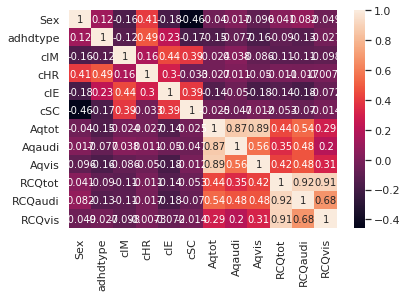

In [45]:
corrMatrix = df_analysis.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### IVA-II
Let's look at the relationships between the behavioral data according to gender and ADHD subtype. As seen in the correlation matrices, most of the behavioral data correlate together. For the sake of keeping the notebook light, only one of these plots is active, but the others can be viewed by uncommenting the following cells. Additionally, regression and various results can be viewed by uncommenting the last line of each plotting cells.

    results.query("Sex == '2' and adhdtype == '1'").px_fit_results.iloc[0].summary()
 

In [46]:
#In order to be able to use electrodes and brainwaves for our future analysis, these variables
#need to be encoded to numerical values.
lb_make = LabelEncoder()
df_eeg["brain_oscillation_num"] = lb_make.fit_transform(df_eeg["brain_oscillation"])
df_eeg["electrode_num"] = lb_make.fit_transform(df_eeg["electrode"])
sns.set(color_codes=True)

In [48]:
fig = px.scatter(df_analysis, x="RCQtot", y="Aqtot", facet_col="adhdtype", color="Sex", trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)

#results.query("Sex == '2' and adhdtype == '1'").px_fit_results.iloc[0].summary()

  adhdtype                                     px_fit_results
0        2  <statsmodels.regression.linear_model.Regressio...
1        1  <statsmodels.regression.linear_model.Regressio...
2        0  <statsmodels.regression.linear_model.Regressio...


In [ ]:
# fig = px.scatter(df_analysis, x="RCQvis", y="Aqvis", facet_col="adhdtype", color="Sex", trendline="ols")
# fig.show()

# results = px.get_trendline_results(fig)
# print(results)

#results.query("Sex == '2' and adhdtype == '1'").px_fit_results.iloc[0].summary()

In [49]:
# fig = px.scatter(df_analysis, x="Aqaudi", y="RCQaudi", facet_col="adhdtype", color="Sex", trendline="ols")
# fig.show()

# results = px.get_trendline_results(fig)
# print(results)

# #results.query("Sex == '2' and adhdtype == '1'").px_fit_results.iloc[0].summary()

  adhdtype                                     px_fit_results
0        2  <statsmodels.regression.linear_model.Regressio...
1        1  <statsmodels.regression.linear_model.Regressio...
2        0  <statsmodels.regression.linear_model.Regressio...


In [ ]:
# fig = px.scatter(df_analysis, x="RCQvis", y="RCQaudi", facet_col="adhdtype", color="Sex", trendline="ols")
# fig.show()

# results = px.get_trendline_results(fig)
# print(results)

# #results.query("Sex == '1' and adhdtype == '2'").px_fit_results.iloc[0].summary()

In [ ]:
# fig = px.scatter(df_analysis, x="Aqvis", y="Aqaudi", facet_col="adhdtype", color="Sex", trendline="ols")
# fig.show()

# results = px.get_trendline_results(fig)
# print(results)

# #results.query("Sex == '2' and adhdtype == '1'").px_fit_results.iloc[0].summary()